# Simple cvb.polimago Classification on a Loaded Image

This notebook demonstrates how to perform object detection and classification using Common Vision Blox (CVB) Polimago on a loaded image.

## 1. Import Required Libraries

We start by importing the necessary libraries: `os`, `sys`, `cvb`, `cvb.polimago`, and relevant display modules.

In [1]:
import os
import sys
import cvb
import cvb.polimago
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## 2. Initialize Device and Load Image

You can either open a device (e.g., a camera) or load a static image file (e.g., BMP). For demonstration, we'll load a BMP image from the Polimago tutorial images.

In [2]:
# Set the path to the sample image (adjust as needed)
image_path = os.path.join(
    cvb.install_path(), "tutorial", "Polimago", "Images", "Cookies", "Test01.bmp"
)

# Load the image
image = cvb.Image(image_path)
print(f"Loaded image: {image_path}")

Loaded image: C:\W\STEMMER_IMAGING\tutorial\Polimago\Images\Cookies\Test01.bmp


## 3. Load Polimago Predictors

Load the SearchPredictor (.psc) and ClassificationPredictor (.pcc) models required for object detection and classification.

In [3]:
# Paths to the predictor files
search_predictor_path = os.path.join(
    cvb.install_path(), "tutorial", "Polimago", "Images", "Cookies", "Cookies.psc"
)
classification_predictor_path = os.path.join(
    cvb.install_path(), "tutorial", "Polimago", "Images", "Cookies", "CookieType.pcc"
)

# Load predictors
search_predictor = cvb.polimago.SearchPredictor(search_predictor_path)
classification_predictor = cvb.polimago.ClassificationPredictor(classification_predictor_path)

print("Loaded SearchPredictor and ClassificationPredictor.")

Loaded SearchPredictor and ClassificationPredictor.


## 4. Perform Grid Search for Objects

Use the SearchPredictor's `grid_search` method to detect objects in the image. We'll use typical parameters for grid step, threshold, and locality. Play around with them!

- GRID_STEP: the factor the sliding window is moved to the next position
- THRESHOLD: the minimum quality a found object is used as a real result
- LOCALITY: the environment around a grid window that is taken into account for search

In [4]:
# Parameters for grid search
GRID_STEP = 0.6
THRESHOLD = 0.0
LOCALITY = 1.0

# Perform grid search
search_results, calls = search_predictor.grid_search(
    image, image.bounds, GRID_STEP, THRESHOLD, LOCALITY
)
print(f"Found {len(search_results)} objects (before quality filtering).")

Found 6 objects (before quality filtering).


## 6. Classify Detected Objects

For each detected object with sufficient quality (e.g., quality >= 0.3), use the ClassificationPredictor to classify it.

In [5]:
# Filter and classify detected objects
min_quality = 0.3
classified_results = []

for res in search_results:
    if res.quality >= min_quality:
        pos = cvb.Point2D(res.x, res.y)
        clf_res, confidence_distribution = classification_predictor.classify(image, pos)
        classified_results.append({
            "position": (res.x, res.y),
            "quality": res.quality,
            "class": clf_res
        })

print(f"Classified {len(classified_results)} objects with quality >= {min_quality}.")

Classified 6 objects with quality >= 0.3.


## 7. Display Classification Results

Print the classification results, including positions and predicted classes for each detected object.

In [6]:
for idx, result in enumerate(classified_results):
    print(
        f"Object {idx+1}: Position={result['position']}, "
        f"Quality={result['quality']:.2f}, "
        f"Class={result['class']}"
    )

Object 1: Position=(166.51867693639798, 161.25629015664236), Quality=0.84, Class=<cvb.polimago.ClassificationResult object at 0x0000025B141252C0>
Object 2: Position=(408.44070394234757, 176.95418213166758), Quality=0.79, Class=<cvb.polimago.ClassificationResult object at 0x0000025B141262B0>
Object 3: Position=(620.223320585501, 164.68057690185853), Quality=0.84, Class=<cvb.polimago.ClassificationResult object at 0x0000025B14125290>
Object 4: Position=(162.49088572923984, 394.7479079152109), Quality=0.87, Class=<cvb.polimago.ClassificationResult object at 0x0000025B14125AA0>
Object 5: Position=(393.1813835160379, 396.35920928231417), Quality=0.70, Class=<cvb.polimago.ClassificationResult object at 0x0000025B14125B30>
Object 6: Position=(623.5048979937691, 393.2126174150687), Quality=0.69, Class=<cvb.polimago.ClassificationResult object at 0x0000025B14124B10>


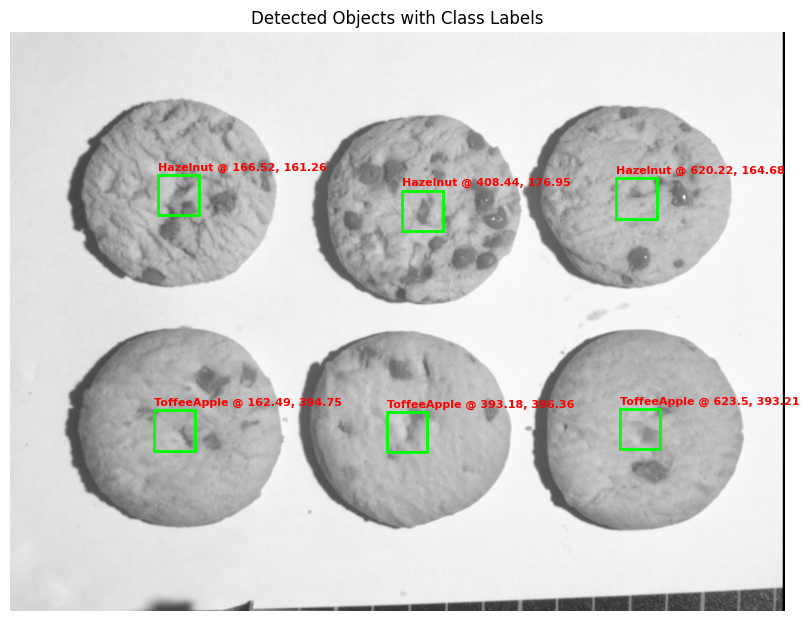

In [7]:
# Convert CVB image to numpy array
img_np = np.array(image)

# Prepare figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Show the image
if img_np.ndim == 2:
    ax.imshow(img_np, cmap='gray')
else:
    ax.imshow(img_np)

# Draw bounding boxes and class labels
box_size = 40  # Adjust as needed
for result in classified_results:
    x, y = result["position"]
    rect = patches.Rectangle(
        (x - box_size // 2, y - box_size // 2),
        box_size, box_size,
        linewidth=2, edgecolor='lime', facecolor='none'
    )
    ax.add_patch(rect)
    ax.text(
        x - box_size // 2, y - box_size // 2 - 5,
        str(result["class"].name)+\
        str(" @ " + str(round(x, 2)) + ", " + str(round(y, 2))),
        color='red', fontsize=8, weight='bold'
    )

ax.set_axis_off()
plt.title("Detected Objects with Class Labels")
plt.show()